<a href="https://colab.research.google.com/github/ViniciusKanh/AIS-DefectDetector/blob/main/AIS_DefectDetector_CIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mealpy

## 📥 1. Importar o Dataset no Colab (via link do GitHub)



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

# URL do dataset NASA-JM1
url = "https://raw.githubusercontent.com/ApoorvaKrisna/NASA-promise-dataset-repository/main/jm1.csv"
df = pd.read_csv(url)

# Normalização
X = df.drop(columns=['defects'])
y = df['defects']
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_ok = X_scaled[y == 0]
X_bug = X_scaled[y == 1]


# ⬛ 2. Algoritmo de Reparo de DNA Artificial

In [ ]:
def reparar_dna(instancia, pool_saudavel, taxa_mut=0.3):
    reparada = instancia.copy()

    # Genes com mutação (ex: atributos mais correlacionados a defeitos)
    genes_alvo = np.random.choice(reparada.index, size=int(taxa_mut * len(reparada)), replace=False)

    for gene in genes_alvo:
        if np.random.rand() < 0.5:
            # Substituição por gene saudável (analogia ao "template")
            reparada[gene] = pool_saudavel[gene].sample(1).values[0]
        else:
            # Pequena mutação corretiva (analogicamente aleatória)
            reparada[gene] = np.clip(reparada[gene] + np.random.normal(0, 0.05), 0, 1)

    return reparada

## 🧪 3. Função de Avaliação com Classificador

In [ ]:
def avaliar_populacao(X_ok, X_def, y_true, verbose=False):
    X_total = pd.concat([X_ok, X_def])
    y_total = pd.Series([0]*len(X_ok) + [1]*len(X_def))
    X_train, X_test, y_train, y_test = train_test_split(X_total, y_total, test_size=0.3, stratify=y_total)

    modelo = RandomForestClassifier(n_estimators=100)
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    f1 = f1_score(y_test, y_pred)
    if verbose:
        print("F1 Score:", f1)
    return f1


## 🧠 4. Simulação Evolutiva com Gerações

In [ ]:
geracoes = 10
f1_historico = []
pop_atual = X_bug.copy()

for geracao in range(geracoes):
    # Aplicar reparo para toda a população defeituosa
    pop_reparada = pop_atual.apply(lambda row: reparar_dna(row, X_ok), axis=1)

    # Avaliar nova população
    f1 = avaliar_populacao(X_ok, pop_reparada, y, verbose=True)
    f1_historico.append(f1)

    # Seleção elitista (preservar os melhores reparos)
    if geracao > 0 and f1 < f1_historico[-2]:
        print("🔁 Reversão: geração anterior era mais apta.")
        pop_reparada = pop_atual  # mantém geração anterior

    pop_atual = pop_reparada  # próxima geração


F1 Score: 0.9563106796116505
F1 Score: 0.99122106943336
F1 Score: 0.992862807295797
F1 Score: 0.9976284584980237
F1 Score: 0.9984177215189873
F1 Score: 0.9960411718131433
🔁 Reversão: geração anterior era mais apta.
F1 Score: 0.9984152139461173
F1 Score: 1.0
F1 Score: 0.9984177215189873
🔁 Reversão: geração anterior era mais apta.
F1 Score: 0.9968354430379747
🔁 Reversão: geração anterior era mais apta.


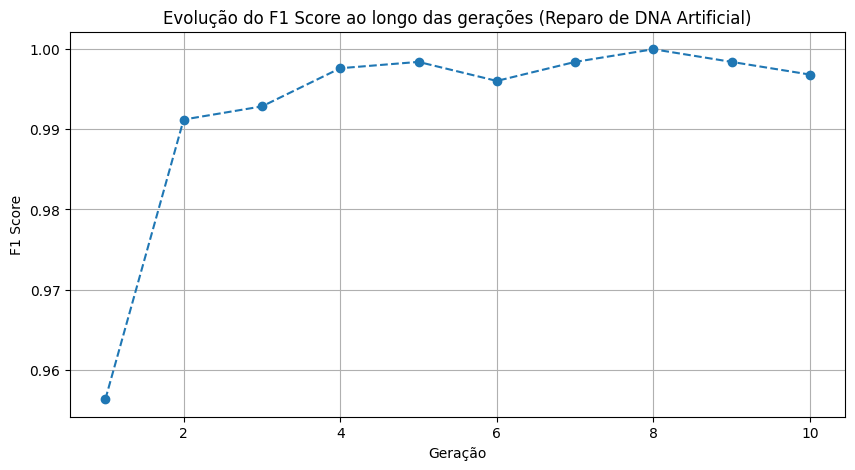

In [ ]:
# ⬛ 5. Visualização da Evolução da Aptidão
plt.figure(figsize=(10, 5))
plt.plot(range(1, geracoes+1), f1_historico, marker='o', linestyle='--')
plt.title("Evolução do F1 Score ao longo das gerações (Reparo de DNA Artificial)")
plt.xlabel("Geração")
plt.ylabel("F1 Score")
plt.grid(True)
plt.show()


# Algoritmo AIS para Detecção de Defeitos de Software

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

# === 1. Carregamento e pré-processamento do dataset ===
url = "https://raw.githubusercontent.com/ApoorvaKrisna/NASA-promise-dataset-repository/main/jm1.csv"
df = pd.read_csv(url)

# Ajustar nome correto da coluna alvo (pode variar)
if 'defects' not in df.columns:
    df.columns = [c.lower() for c in df.columns]
X = df.drop(columns=['defects'])
y = df['defects']

# Normalização
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Separar conjuntos
X_ok = X_scaled[y == 0].reset_index(drop=True)      # Antígenos saudáveis
X_bug = X_scaled[y == 1].reset_index(drop=True)     # Antígenos defeituosos


## 🔬 2. Funções do Sistema Imunológico Artificial

In [ ]:
# Calcula a afinidade (distância euclidiana inversa)
def afinidade(a, b):
    return 1.0 / (1e-5 + np.linalg.norm(a - b))

# Clonagem proporcional à afinidade (mais afinidade = mais clones)
def clonar(anticorpo, afinidade_val, beta=5):
    n_clones = int(beta * afinidade_val)
    clones = [anticorpo.copy() for _ in range(n_clones)]
    return clones

# Mutação leve nos clones (diferenciação clonal)
def mutar(clone, taxa=0.1):
    gene = np.random.choice(clone.index)
    clone[gene] = np.clip(clone[gene] + np.random.normal(0, taxa), 0, 1)
    return clone


## 🧪 3. Loop Evolutivo (Ciclo Imunológico Artificial)

In [ ]:
# Inicialização da população de anticorpos
pop_tam = 30
anticorpos = [X_ok.sample(1).iloc[0] for _ in range(pop_tam)]

# Histórico de F1-score
historico_f1 = []

# Rodadas de evolução
geracoes = 10
for g in range(geracoes):
    clones_todos = []

    # Para cada anticorpo, calcular afinidade e clonar/mutar
    for ant in anticorpos:
        afinidades = [afinidade(ant.values, bug.values) for _, bug in X_bug.iterrows()]
        afin_media = np.mean(afinidades)
        clones = clonar(ant, afin_media)
        clones_mutados = [mutar(c.copy()) for c in clones]
        clones_todos.extend(clones_mutados)

    # Avaliar todos os clones como detectores (classificação)
    X_total = pd.concat([X_ok, pd.DataFrame(clones_todos)], ignore_index=True)
    y_total = pd.Series([0] * len(X_ok) + [1] * len(clones_todos))

    X_train, X_test, y_train, y_test = train_test_split(X_total, y_total, test_size=0.3, stratify=y_total)

    modelo = RandomForestClassifier()
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    historico_f1.append(f1)

    # Seleção dos melhores anticorpos (elitismo)
    anticorpos = sorted(clones_todos, key=lambda c: -np.mean([afinidade(c.values, b.values) for _, b in X_bug.iterrows()]))[:pop_tam]
    print(f"Geração {g+1}: F1 = {f1:.4f}")


Geração 1: F1 = 0.9035
Geração 2: F1 = 0.9962
Geração 3: F1 = 0.9930
Geração 4: F1 = 0.9946
Geração 5: F1 = 0.9970
Geração 6: F1 = 0.9987
Geração 7: F1 = 0.9981
Geração 8: F1 = 0.9981
Geração 9: F1 = 0.9984
Geração 10: F1 = 0.9987


## 📈 4. Visualização da Evolução da Aptidão

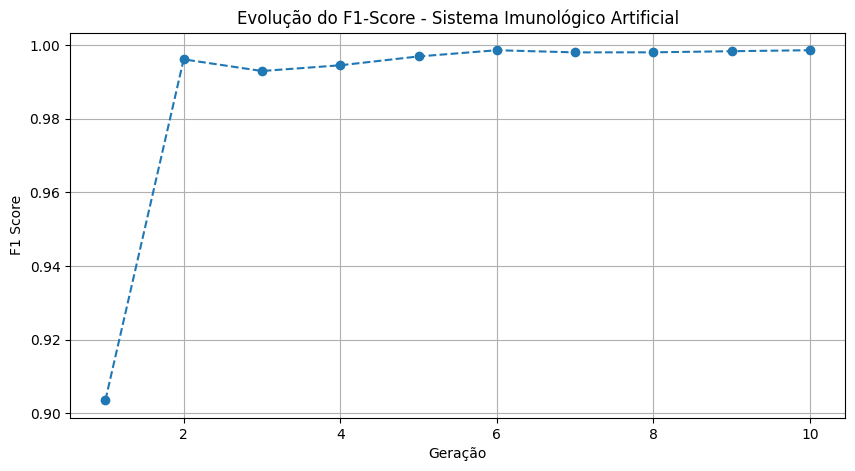

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, geracoes+1), historico_f1, marker='o', linestyle='--')
plt.title("Evolução do F1-Score - Sistema Imunológico Artificial")
plt.xlabel("Geração")
plt.ylabel("F1 Score")
plt.grid(True)
plt.show()
